# 时间相关

In [1]:
import pandas as pd
import time
# 测试注释
# 测试
df=pd.read_csv('fake_transactional_data_24.csv')
df['not_happened_yet_date']=pd.to_datetime(df['not_happened_yet_date'])
df['day_of_week']=df['not_happened_yet_date'].dt.dayofweek
display(df)

C:\Users\86180\AppData\Local\Temp\ipykernel_3860\1499266019.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['not_happened_yet_date']=pd.to_datetime(df['not_happened_yet_date'])


,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,day_of_week
0,10371,4.00,CINEMA,2025-01-01,2
1,88339,2.40,40544,2025-01-01,2
2,18555,2.40,85149,2025-01-01,2
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,2
4,80792,1.95,18555,2025-01-01,2
...,...,...,...,...,...
1048570,9869,44.69,TAKEAWAY,2025-07-02,2
1048571,9869,2.25,TOTALLY_A_REAL_COFFEE_SHOP,2025-07-02,2
1048572,9869,2.40,A_CAFE,2025-07-02,2
1048573,9869,2.25,A_LOCAL_COFFEE_SHOP,2025-07-02,2


## 日期-总金额

In [2]:
df_date=df.drop(['from_totally_fake_account','to_randomly_generated_account','day_of_week'],axis=1)
df_date=(df_date.groupby(['not_happened_yet_date'])
         .agg({'sum','count'})
         .sort_values(['not_happened_yet_date'])
         .rename(columns={'monopoly_money_amount':'transaction'})
        )

<Axes: xlabel='not_happened_yet_date'>

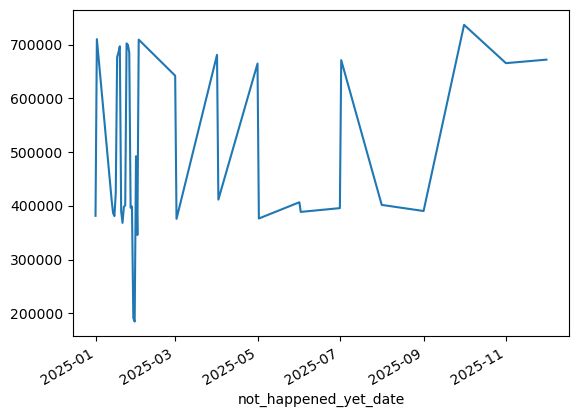

In [3]:
df_date['transaction']['sum'].plot()

## 日期-流量

<Axes: xlabel='not_happened_yet_date'>

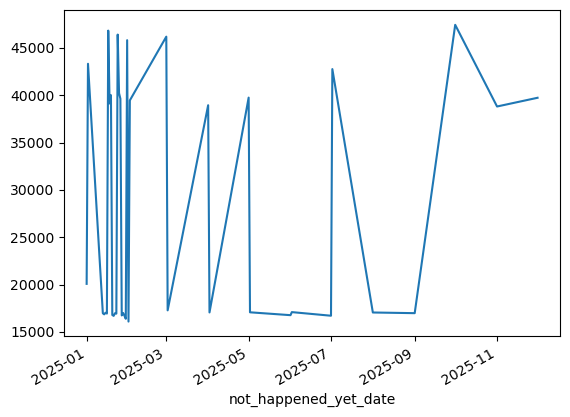

In [4]:
df_date['transaction']['count'].plot()

## 星期-总金额

In [5]:
week_title=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df_week=df.drop(['from_totally_fake_account','to_randomly_generated_account','not_happened_yet_date'],axis=1)
df_week=(df_week.groupby(['day_of_week'])
         .agg({'sum','count'})
         .sort_values(['day_of_week'])
         .rename(columns={'monopoly_money_amount':'transaction'})
        )
df_week.index=week_title

<Axes: >

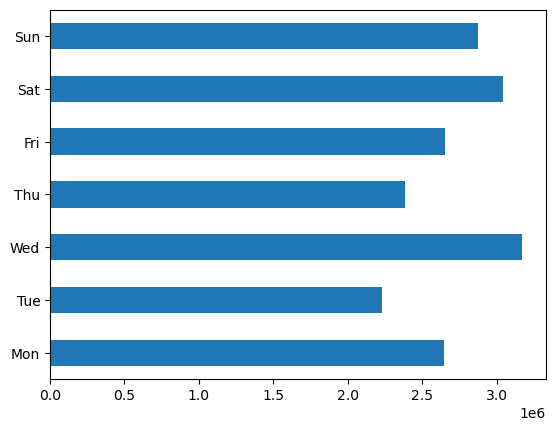

In [6]:
df_week['transaction']['sum'].plot.barh()

## 星期-流量

<Axes: >

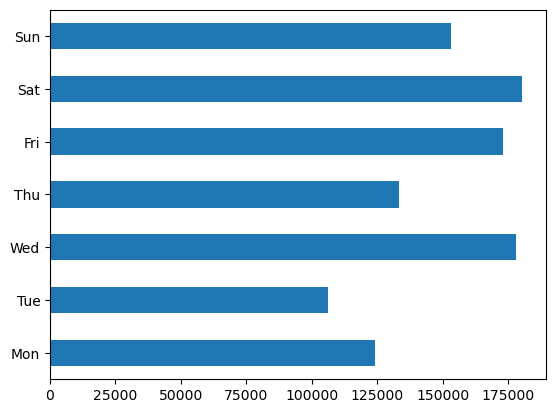

In [7]:
df_week['transaction']['count'].plot.barh()

## 从商户出发

In [8]:
df_merchant=df.groupby(['to_randomly_generated_account']).agg(list).sort_values(['to_randomly_generated_account'])
display(df_merchant)

,from_totally_fake_account,monopoly_money_amount,not_happened_yet_date,day_of_week
to_randomly_generated_account,,,,
1000,"[5403, 5403, 5403, 77084, 77084, 77084, 56140,...","[6.0, 6.0, 6.0, 4.5, 4.5, 334.0, 334.0, 5.5, 9...","[2025-04-01 00:00:00, 2025-04-01 00:00:00, 202...","[1, 1, 1, 3, 3, 1, 1, 2, 5, 3, 5, 5, 4, 3, 3, ..."
10000,"[54397, 54397, 54397, 98543, 15896, 79147, 791...","[9.0, 9.0, 5.5, 4.5, 4.5, 6.0, 6.0, 5.5, 4.5, ...","[2025-03-01 00:00:00, 2025-03-01 00:00:00, 202...","[5, 5, 5, 3, 2, 5, 5, 0, 2, 4, 4, 4, 5, 4, 6, ..."
100000,"[81179, 92174, 94840, 94840, 34678, 34678, 397...","[2.65, 6.0, 5.5, 5.5, 5.5, 4.5, 5.5, 9.0, 5.5,...","[2025-03-01 00:00:00, 2025-03-01 00:00:00, 202...","[5, 5, 1, 1, 1, 0, 2, 4, 5, 5, 6, 3, 4, 4, 4, ..."
100002,"[89517, 89517, 92601, 92601, 92601, 46953, 926...","[5.0, 5.0, 4.5, 4.5, 4.5, 6.0, 6.0, 6.0, 6.0, ...","[2025-03-01 00:00:00, 2025-03-01 00:00:00, 202...","[5, 5, 1, 1, 1, 3, 5, 4, 4, 4, 5, 5, 4, 5, 5, ..."
100019,"[40565, 40565, 40565, 40565, 94272, 94272, 942...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1080....","[2025-03-01 00:00:00, 2025-03-01 00:00:00, 202...","[5, 5, 5, 5, 1, 3, 3, 3, 1, 2, 2, 4, 5, 5, 6, ..."
...,...,...,...,...
WE_HAVE_BEAN_WEIGHTING,"[39993, 81402, 43924, 29798, 88363, 90400, 567...","[28.64, 48.64, 23.64, 29.55, 26.36, 6.82, 18.1...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, ..."
WHISKEY_BAR,"[51162, 15239, 68656, 20984, 16523, 33270, 948...","[9.0, 12.0, 12.0, 15.0, 15.5, 11.5, 10.0, 13.5...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
WHISKEY_SHOP,"[67840, 7088, 54995, 52012, 17379, 63390, 6245...","[24.99, 19.99, 12.0, 29.99, 12.0, 8.99, 74.99,...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, ..."


In [9]:
class Merchant:
    def __init__(self,account):
        self.df=df_merchant[df_merchant.index==account]
        while self.df.empty:
            account=input('The account you selected does not exist, please try another account: ')
            self.df=df_merchant[df_merchant.index==account]
        self.fdf=self.df.explode(['from_totally_fake_account','monopoly_money_amount','not_happened_yet_date','day_of_week'])
    def customer_group(self):
        [group]=self.df['from_totally_fake_account'].tolist()
        group=sorted(set(group),key=group.index)
        return group
    def date_frequency(self):
        [frequency]=self.df['not_happened_yet_date'].tolist()
        date=sorted(set(frequency),key=frequency.index)
        date_frequency=[]
        for d in date:
            date_frequency.append([d,frequency.count(d)])
        df=pd.DataFrame(date_frequency)
        df.columns=['date','frequency']
        df.set_index('date',inplace=True)
        return df
    def week_frequency(self):
        [frequency]=self.df['day_of_week'].tolist()
        week=week_title
        week_frequency=[]
        for w in range(len(week)):
            week_frequency.append([week[w],frequency.count(w)])
        df=pd.DataFrame(week_frequency)
        df.columns=['week','frequency']
        df.set_index('week',inplace=True)
        return df

### 示例：对于商户‘1000’

In [10]:
m=Merchant('1000')
m.fdf

,from_totally_fake_account,monopoly_money_amount,not_happened_yet_date,day_of_week
to_randomly_generated_account,,,,
1000,5403,6.0,2025-04-01,1
1000,5403,6.0,2025-04-01,1
1000,5403,6.0,2025-04-01,1
1000,77084,4.5,2025-05-01,3
1000,77084,4.5,2025-05-01,3
1000,77084,334.0,2025-07-01,1
1000,56140,334.0,2025-07-01,1
1000,41718,5.5,2025-10-01,2
1000,5403,9.0,2025-11-01,5


### 其客户群体：

In [11]:
m.customer_group()

[5403, 77084, 56140, 41718, 36647, 38289]

### 其交易频率/日期：

<Axes: xlabel='date'>

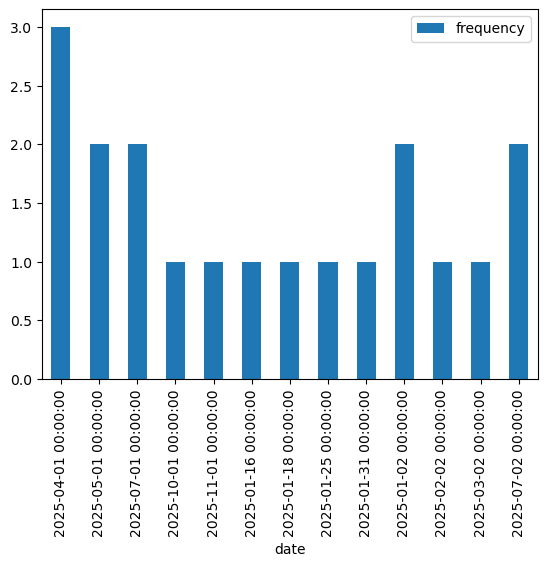

In [12]:
m.date_frequency().plot.bar()

### 其交易频率/星期：

<Axes: xlabel='week'>

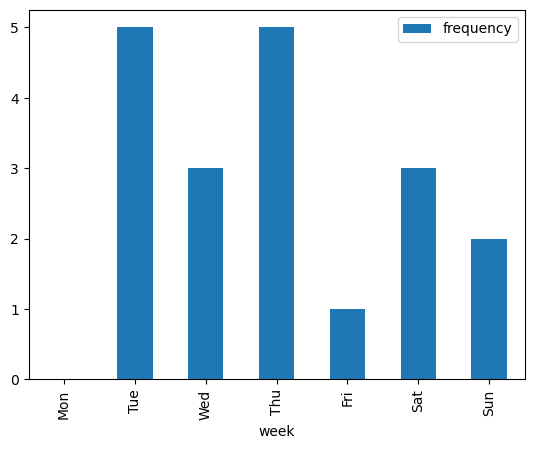

In [13]:
m.week_frequency().plot.bar()

## 从用户出发

In [14]:
df_customer=df.groupby(['from_totally_fake_account']).agg(list).sort_values(['from_totally_fake_account'])
display(df_customer)

,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,day_of_week
from_totally_fake_account,,,,
1000,"[8.99, 2.4, 2.55, 2.2, 13.06, 4.5, 2.45, 2.2, ...","[STREAMING_SERVICE, GOURMET_COFFEE_SHOP, GOURM...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1002,"[7.0, 2.25, 8.48, 8.99, 2.4, 2.15, 4.0, 11.0, ...","[DVD_SHOP, A_CAFE, 74646, STREAMING_SERVICE, A...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, ..."
1006,"[2.55, 2.4, 2.4, 8.99, 2.2, 4.35, 2.2, 1.95, 1...","[TOTALLY_A_REAL_COFFEE_SHOP, A_LOCAL_COFFEE_SH...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, ..."
1018,"[17.14, 1.5, 1.5, 1.5, 6.0, 1.5, 1.5, 38.04, 5...","[INDIAN_RESTAURANT, PUB, PUB, PUB, KEBAB_SHOP,...","[2025-01-01 00:00:00, 2025-03-01 00:00:00, 202...","[2, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 3, 3, ..."
1053,"[6.0, 5.0, 8.99, 3.5, 369.0, 2.65, 4.5, 11.0, ...","[49267, LUNCH_VAN, STREAMING_SERVICE, LUNCH_VA...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 5, 5, 5, 5, 1, 1, 1, 1, 3, 3, 6, 1, ..."
...,...,...,...,...
100931,"[52.0, 20.0, 8.99, 2.45, 6.0, 6.0, 9.0, 9.0, 1...","[GAME_SHOP, GYM, STREAMING_SERVICE, 32093, PUB...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 5, 5, 5, 1, 1, 1, 1, 1, 1, 3, 3, 3, ..."
100934,"[15.0, 8.99, 5.1, 2.15, 12.5, 6.5, 12.5, 5.5, ...","[NERDY_BOOK_STORE, STREAMING_SERVICE, COFFEE_S...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 3, 3, ..."
100947,"[2.55, 5.0, 184.0, 8.99, 6.0, 5.0, 4.0, 3.5, 1...","[COFFEE_SHOP, CAFE, 33411, STREAMING_SERVICE, ...","[2025-01-01 00:00:00, 2025-01-01 00:00:00, 202...","[2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, ..."


In [15]:
class Customer:
    def __init__(self,account):
        self.df=df_customer[df_customer.index==int(account)]
        while self.df.empty:
            account=input('The account you selected does not exist, please try another account: ')
            self.df=df_customer[df_customer.index==account]
        self.fdf=self.df.explode(['monopoly_money_amount','to_randomly_generated_account','not_happened_yet_date','day_of_week'])
    def merchant_group(self):
        [group]=self.df['to_randomly_generated_account'].tolist()
        group=sorted(set(group),key=group.index)
        return group
    def date_frequency(self):
        [frequency]=self.df['not_happened_yet_date'].tolist()
        date=sorted(set(frequency),key=frequency.index)
        date_frequency=[]
        for d in date:
            date_frequency.append([d,frequency.count(d)])
        df=pd.DataFrame(date_frequency)
        df.columns=['date','frequency']
        df.set_index('date',inplace=True)
        return df
    def week_frequency(self):
        [frequency]=self.df['day_of_week'].tolist()
        week=week_title
        week_frequency=[]
        for w in range(len(week)):
            week_frequency.append([week[w],frequency.count(w)])
        df=pd.DataFrame(week_frequency)
        df.columns=['week','frequency']
        df.set_index('week',inplace=True)
        return df
    def merchant_frequency(self):
        [frequency]=self.df['to_randomly_generated_account'].tolist()
        merchant=sorted(set(frequency),key=frequency.index)
        merchant_frequency=[]
        for m in merchant:
            merchant_frequency.append([m,frequency.count(m)])
        df=pd.DataFrame(merchant_frequency)
        df.columns=['merchant','frequency']
        df.set_index('merchant',inplace=True)
        return df

### 示例：对于用户‘1000’

In [16]:
c=Customer('1000')
c.fdf

,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,day_of_week
from_totally_fake_account,,,,
1000,8.99,STREAMING_SERVICE,2025-01-01,2
1000,2.4,GOURMET_COFFEE_SHOP,2025-01-01,2
1000,2.55,GOURMET_COFFEE_SHOP,2025-01-01,2
1000,2.2,A_LOCAL_COFFEE_SHOP,2025-01-01,2
1000,13.06,LOCAL_PUB,2025-01-01,2
...,...,...,...,...
1000,1.45,A_LOCAL_COFFEE_SHOP,2025-07-02,2
1000,2.4,A_CAFE,2025-07-02,2
1000,1.45,A_LOCAL_COFFEE_SHOP,2025-07-02,2


### 其商户群体

In [17]:
c.merchant_group()

['STREAMING_SERVICE',
 'GOURMET_COFFEE_SHOP',
 'A_LOCAL_COFFEE_SHOP',
 'LOCAL_PUB',
 'CAFE',
 'HIPSTER_COFFEE_SHOP',
 'PRETENTIOUS_COFFEE_SHOP',
 '50340',
 'PUB',
 'A_CAFE',
 '55738',
 'KEBAB_SHOP',
 'WINE_BAR',
 '5403',
 'CHINESE_TAKEAWAY',
 '82909',
 'COFFEE_SHOP',
 'BAR',
 '16354',
 '77084',
 '31489',
 '51051',
 'TOTALLY_A_REAL_COFFEE_SHOP',
 'DVD_SHOP',
 'PET_TOY_SHOP',
 'CINEMA',
 'TAKEAWAY',
 'PET_SHOP',
 '56140',
 'WHISKEY_BAR',
 '47421',
 'G&T_BAR',
 'LOCAL_WATERING_HOLE',
 '72221',
 'LUNCH_VAN',
 '18013',
 'COCKTAIL_BAR',
 '64760',
 'WE_HAVE_BEAN_WEIGHTING',
 '82399',
 'LOCAL_RESTAURANT']

### 其交易频率/日期

<Axes: xlabel='date'>

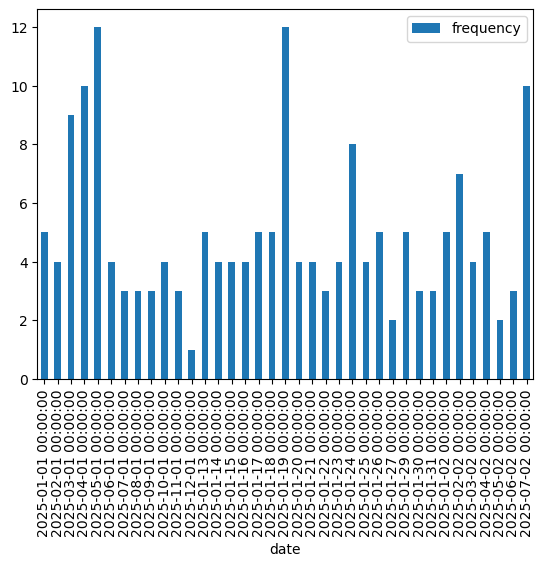

In [18]:
c.date_frequency().plot.bar()

### 其交易频率/星期

<Axes: xlabel='week'>

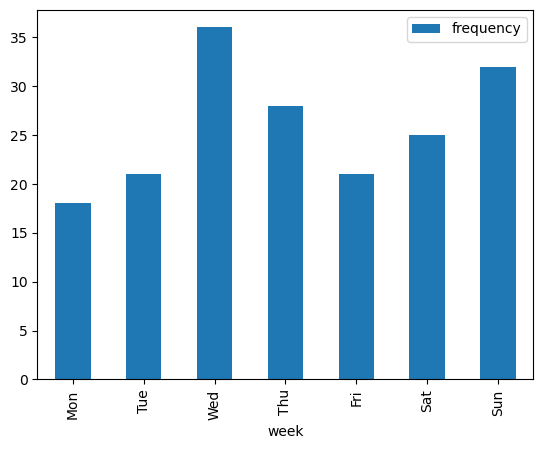

In [19]:
c.week_frequency().plot.bar()

### 其交易频率/商户

<Axes: xlabel='merchant'>

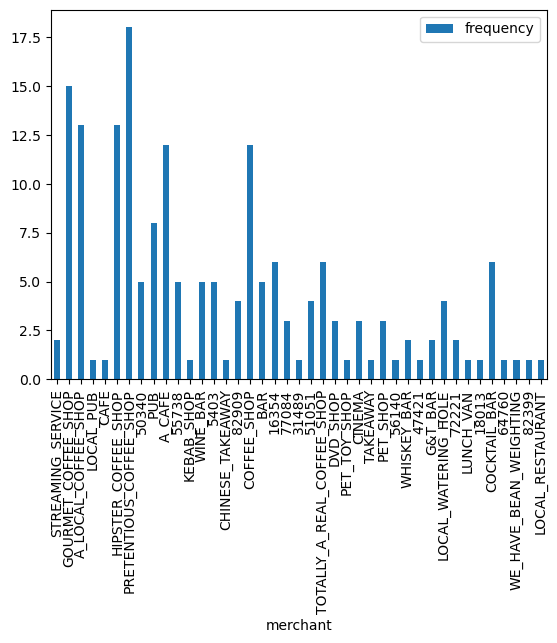

In [20]:
c.merchant_frequency().plot.bar()

### 预留